In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import csv
from sklearn.metrics import confusion_matrix, classification_report

In [145]:
#turning of the scientic notation
np.set_printoptions(suppress=True)
x = np.linspace(0.00001,1,15)
y = [0.86861, 0.88072, 0.87924, 0.87658, 0.87245, 
     0.86979, 0.86654, 0.86300, 0.86034, 0.85710,
     0.85444, 0.85178, 0.84824, 0.84529, 0.84174]

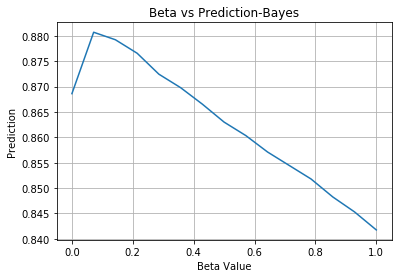

In [25]:
#Bayes plot for the Beta
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel='Beta Value', ylabel='Prediction',
       title='Beta vs Prediction-Bayes')
ax.grid()
fig.savefig("Bayes_Prediction_1.png")
plt.show()

In [19]:
#used to create the mle and map
#python NaiveBayesClassifier.py train data/training.npz 0.00001 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.07143786 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.14286571 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.21429357 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.28572143 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.35714929 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.42857714 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.500005 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.57143286 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.64286071 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.71428857 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.78571643 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.85714429 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 0.92857214 test_network TrainedNetworks/
#python NaiveBayesClassifier.py train data/training.npz 1.0 test_network TrainedNetworks/

#For Problem: 7
#python NaiveBayesClassifier.py train data/training.npz 0.000016343073805 test_network_Q7 TrainedNetworks/

In [5]:
#used to create the prediction 
#python NaiveBayesClassifier.py predict data/testing.npz test_network_1e-05 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.07143786 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.14286571 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.21429357 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.28572143 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.35714929 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.42857714 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.500005 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.57143286 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.64286071 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.71428857 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.78571643 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.85714429 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_0.92857214 TrainedNetworks/
#python NaiveBayesClassifier.py predict data/testing.npz test_network_1.0 TrainedNetworks/

In [6]:
ada_ = np.linspace(0.01,0.001,4)
lambda_ = np.linspace(0.01,0.001,4)

#Attempts in total 16 combinations
#epoch:20000
#max epoch:100
#split train and val:80 - 20

In [5]:
different_combinations = ((0.001, 0.001), (0.001, 0.004), (0.001, 0.007), (0.001, 0.01), (0.004, 0.001), (0.004,
 0.004), (0.004, 0.007), (0.004, 0.01), (0.007, 0.001), (0.007, 0.004), (0.007, 0.007), (0.007, 0.01), (0.01, 0.001), (0.01, 0.004), (0.01, 0.007), (0.01, 0.01)) 

In [11]:
different_combinations

((0.001, 0.001),
 (0.001, 0.004),
 (0.001, 0.007),
 (0.001, 0.01),
 (0.004, 0.001),
 (0.004, 0.004),
 (0.004, 0.007),
 (0.004, 0.01),
 (0.007, 0.001),
 (0.007, 0.004),
 (0.007, 0.007),
 (0.007, 0.01),
 (0.01, 0.001),
 (0.01, 0.004),
 (0.01, 0.007),
 (0.01, 0.01))

In [12]:
#python LinearRegressorClassifier.py train data/training.npz 0.01 0.01 20000 100 0.20 network TrainedNetworks/ 
#python LinearRegressorClassifier.py train data/training.npz 0.01 0.007 20000 100 0.20 network TrainedNetworks/
#python LinearRegressorClassifier.py train data/training.npz 0.01 0.004 20000 100 0.20 network TrainedNetworks/
#python LinearRegressorClassifier.py train data/training.npz 0.01 0.001 20000 100 0.20 network TrainedNetworks/

#python LinearRegressorClassifier.py train data/training.npz 0.007 0.01 20000 100 0.20 network TrainedNetworks/
#python LinearRegressorClassifier.py train data/training.npz 0.007 0.007 20000 100 0.20 network TrainedNetworks/
#python LinearRegressorClassifier.py train data/training.npz 0.007 0.004 20000 100 0.20 network TrainedNetworks/
#python LinearRegressorClassifier.py train data/training.npz 0.007 0.001 20000 100 0.20 network TrainedNetworks/

In [2]:
#python LinearRegressorClassifier.py predict data/testing.npz network_0.01_0.01_1158_best TrainedNetworks/ #0.76586
#python LinearRegressorClassifier.py predict data/testing.npz network_0.01_0.007_145_best TrainedNetworks/ #0.65279
#python LinearRegressorClassifier.py predict data/testing.npz network_0.01_0.004_1080_best TrainedNetworks/ #0.76380
#python LinearRegressorClassifier.py predict data/testing.npz network_0.01_0.001_136_best TrainedNetworks/ #0.64836

#python LinearRegressorClassifier.py predict data/testing.npz network_0.007_0.01_217_best TrainedNetworks/ #0.64157
#python LinearRegressorClassifier.py predict data/testing.npz network_0.007_0.007_183_best TrainedNetworks/ #0.64836
#python LinearRegressorClassifier.py predict data/testing.npz network_0.007_0.004_189_best TrainedNetworks/ #0.67906
#python LinearRegressorClassifier.py predict data/testing.npz network_0.007_0.001_127_best TrainedNetworks/ #0.61234

#python LinearRegressorClassifier.py predict data/testing.npz hal_0.004_0.01_1255_best TrainedNetworks/LRC/ #0.75287
#python LinearRegressorClassifier.py predict data/testing.npz gaia_0.004_0.007_70_best TrainedNetworks/LRC/ #0.51668
#python LinearRegressorClassifier.py predict data/testing.npz johnny5_0.004_0.004_89_best TrainedNetworks/LRC/ #0.51077
#python LinearRegressorClassifier.py predict data/testing.npz bumblebee_0.004_0.001_83_best TrainedNetworks/LRC/ #0.50369

#python LinearRegressorClassifier.py predict data/testing.npz chappie_0.001_0.01_20000_best TrainedNetworks/LRC/ #0.86654
#python LinearRegressorClassifier.py predict data/testing.npz lore2_0.001_0.007_20000_best TrainedNetworks/LRC/ #0.86566
#python LinearRegressorClassifier.py predict data/testing.npz lore1_0.001_0.004_20000_best TrainedNetworks/LRC/ #0.86566
#python LinearRegressorClassifier.py predict data/testing.npz unicron_0.001_0.001_20000_best TrainedNetworks/LRC/ #0.86566
#probably is the minima


In [3]:
#Plot for the Logisitc Regression for different values of Eta and Lambda

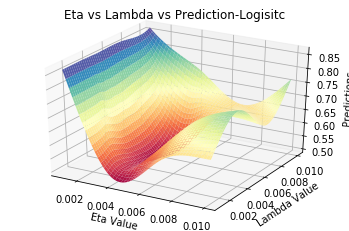

In [25]:
data = [(0.001, 0.001, 0.86566), (0.001, 0.004, 0.86566), (0.001, 0.007, 0.86566), (0.001, 0.01, 0.86654), 
        (0.004, 0.001, 0.50369), (0.004,0.004, 0.51077), (0.004, 0.007, 0.51668), (0.004, 0.01, 0.75287), 
        (0.007, 0.001, 0.61234), (0.007, 0.004, 0.67906), (0.007, 0.007, 0.64836), (0.007, 0.01, 0.64157), 
        (0.01, 0.001, 0.64836), (0.01, 0.004, 0.76380), (0.01, 0.007, 0.65279), (0.01, 0.01, 0.76586)]
x, y, z = zip(*data)
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z, cmap=plt.cm.Spectral)
ax.set(xlabel='Eta Value', ylabel='Lambda Value', zlabel = 'Predictions',
       title='Eta vs Lambda vs Prediction-Logisitc')
fig.savefig("Logisitc_Prediction_1.png")
plt.show()

In [8]:
##Cofusion Matix for Bayes Outcome
Log_Reg_Pred = list()
with open('/Users/DheemanSaha/Dropbox/UNM/CS529/cs529/cs529-project2/TrainedNetworks/LRC/unicron_training_0.001_0.001_finaleval.csv', newline='') as csvfile:
    #csvreader = csv.reader(csvfile, delimiter=' ')
    Log_Reg_Pred = list(csv.reader(csvfile))

##converting this list into array
Log_Reg_Pred = np.array(Log_Reg_Pred)

In [9]:
Log_Reg_Actual_y =  Log_Reg_Pred[0:, 1]
Log_Reg_Pred_y = Log_Reg_Pred[0:, 2]

#converting the string type to int
Log_Reg_Actual_y = Log_Reg_Actual_y.astype(np.int)
Log_Reg_Pred_y = Log_Reg_Pred_y.astype(np.int)

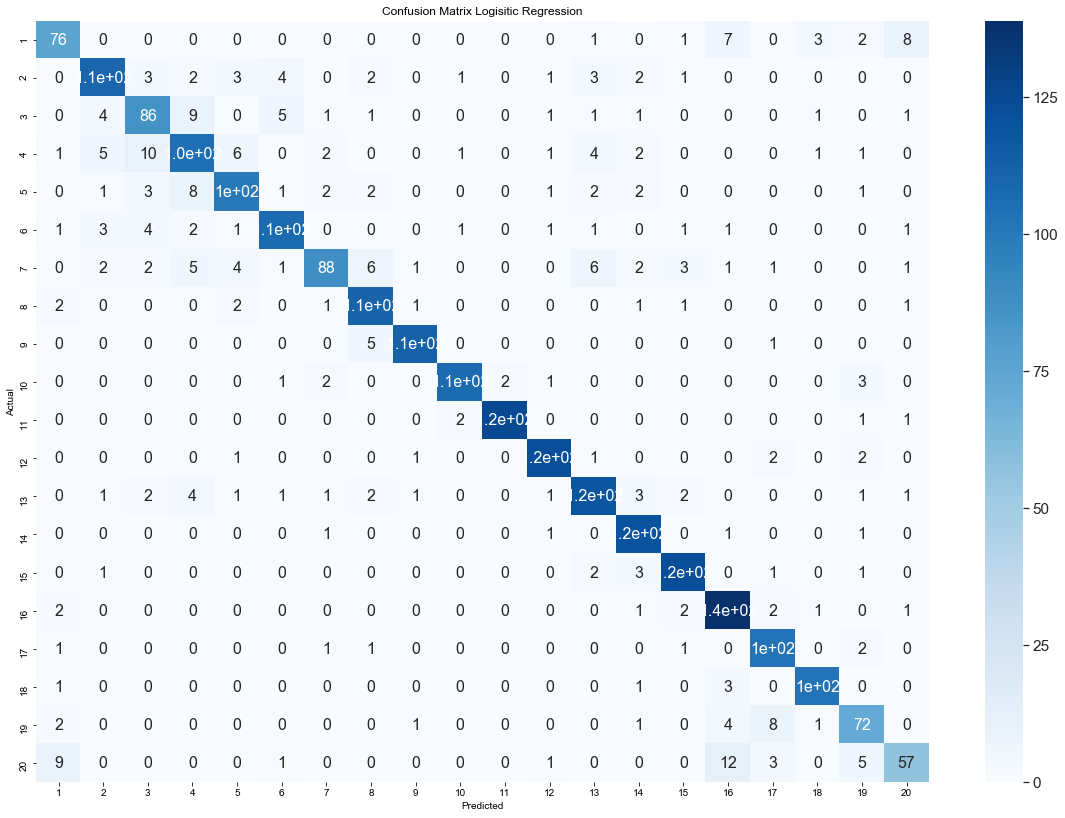

In [10]:
data = confusion_matrix(Log_Reg_Actual_y, Log_Reg_Pred_y)
df_cm = pd.DataFrame(data, columns=np.unique(Log_Reg_Actual_y), index = np.unique(Log_Reg_Actual_y), dtype=int)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (20,14))
plt.title('Confusion Matrix Logisitic Regression')
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})
plt.savefig('Confusion_Matrix_Logisitic_Regression.png')

In [16]:
Logisitc_Regression_Classification_Report = classification_report(Log_Reg_Actual_y, Log_Reg_Pred_y)
#Logisitc_Regression_Classification_Report
#classification report of Naive Bayes validation set
file = open('LogisiticRegression__0.001_0.01_20000.report', 'w')
file.writelines(Logisitc_Regression_Classification_Report)
file.close()

In [150]:
#importing the confusion matix manually
NaiveBayes_Classification_Results = open('/Users/DheemanSaha/Dropbox/UNM/CS529/cs529/cs529-project2/NaiveBayes_0.05.report', 'r')
NB_data_cm = NaiveBayes_Classification_Results.read()

In [13]:
#included the values individually 
NB_confusion_matrix = [[84 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 3 , 0 , 0 , 1 , 7 ],
                      [ 0 ,110, 3 , 2 , 6 , 2 , 1 , 1 , 0 , 1 , 0 , 2 , 4 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ],
                      [ 0 , 7 ,76 , 9 , 6 , 8 , 0 , 2 , 0 , 0 , 1 , 0 , 2 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ],
                      [ 0 , 4 , 5 ,110, 8 , 1 , 2 , 1 , 0 , 0 , 1 , 0 , 6 , 0 , 0 , 0 , 0 , 0 , 1 , 0 ],
                      [ 1 , 1 , 2 , 4 ,106, 0 , 4 , 1 , 0 , 0 , 0 , 1 , 2 , 0 , 1 , 0 , 0 , 0 , 0 , 0 ],
                      [ 0 , 5 , 4 , 0 , 4 ,104, 0 , 0 , 1 , 0 , 0 , 3 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 0 ],
                      [ 0 , 1 , 4 , 8 , 4 , 0 ,89 , 5 , 1 , 0 , 0 , 0 , 7 , 0 , 2 , 0 , 1 , 0 , 1 , 0 ],
                      [ 0 , 0 , 0 , 0 , 1 , 1 , 1 ,109, 5 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 0 , 0 ],
                      [ 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2 ,115, 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 ],
                      [ 0 , 1 , 0 , 1 , 0 , 1 , 1 , 0 , 0 ,109, 2 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ],
                      [ 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 1 ,127, 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ],
                      [ 0 , 3 , 0 , 1 , 2 , 0 , 1 , 0 , 0 , 0 , 0 ,117, 1 , 0 , 0 , 0 , 2 , 0 , 3 , 0 ],
                      [ 0 , 5 , 2 , 4 , 3 , 1 , 0 , 2 , 1 , 0 , 0 , 1 ,120, 0 , 0 , 0 , 0 , 0 , 1 , 0 ],
                      [ 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 1 , 0 ,118, 2 , 0 , 1 , 0 , 0 , 0 ],
                      [ 0 , 5 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 2 ,122, 0 , 0 , 0 , 0 , 0 ],
                      [ 3 , 0 , 0 , 0 , 2 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 2 , 0 , 0 ,137, 0 , 2 , 0 , 1 ],
                      [ 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ,105, 0 , 1 , 1 ],
                      [ 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2 , 1 ,104, 0 , 0 ],
                      [ 2 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 2 , 6 , 1 ,77 , 0 ],
                      [ 7 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 ,11 , 5 , 0 , 3 ,59 ]]

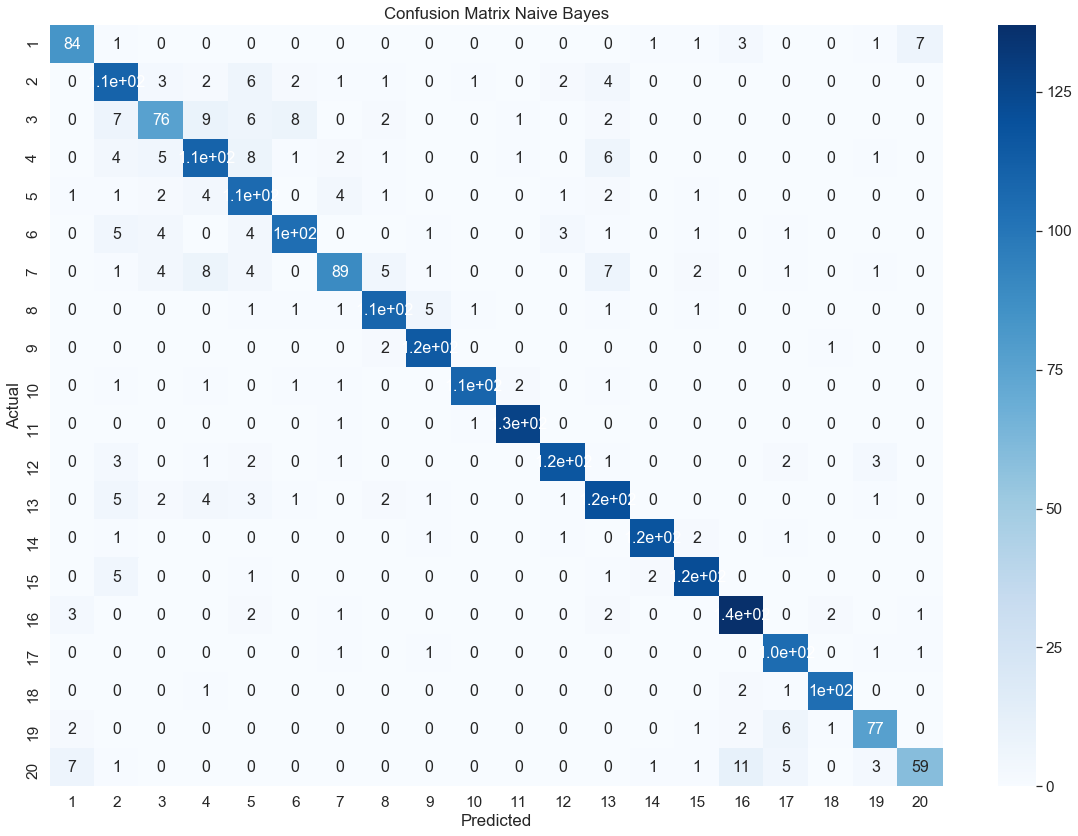

In [14]:
NB_cm_df = pd.DataFrame(NB_confusion_matrix, columns=np.unique(Log_Reg_Actual_y), 
                        index = np.unique(Log_Reg_Actual_y), dtype=int)
NB_cm_df.index.name = 'Actual'
NB_cm_df.columns.name = 'Predicted'

plt.figure(figsize = (20,14))
plt.title('Confusion Matrix Naive Bayes')
sn.set(font_scale=1.4) #for label size
sn.heatmap(NB_cm_df, cmap="Blues", annot=True,annot_kws={"size": 16})
plt.savefig('Confusion_Matrix_Naive_Bayes.png')